In [1]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
simout = pd.read_parquet('simulation_output_parquet.parquet')

In [4]:
simout

,mc_value_type,mc_infection_stage,mc_age,mc_name,11001,11002,11004,11005,11007,11008,...,92141,92142,93010,93014,93018,93022,93056,93088,93090,date
0,incidence,S,age0to5,S_age0to5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024-01-01
1,incidence,S,age5to15,S_age5to15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024-01-01
2,incidence,S,age15to65,S_age15to65,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024-01-01
3,incidence,S,age65to120,S_age65to120,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024-01-01
4,incidence,I,age0to5,I_age0to5,4.470311e-11,3.622298e-07,4.001716e-11,8.387409e-09,8.571088e-09,2.753506e-08,...,2.893800e-08,4.549105e-08,6.284515e-11,1.202665e-08,4.998271e-09,2.677213e-08,2.575398e-08,4.406305e-08,2.916109e-08,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,prevalence,I,age65to120,I_age65to120,4.706577e+01,2.074184e+03,5.369085e+01,5.653670e+01,4.322416e+01,1.718652e+02,...,6.598958e+01,2.016333e+02,3.540210e+01,1.013612e+02,2.535104e+01,9.610196e+01,8.115819e+01,1.551307e+02,5.474164e+01,2024-05-01
2924,prevalence,R,age0to5,R_age0to5,2.651036e+01,3.222958e+03,3.717458e+01,7.139402e+01,5.244266e+01,1.114548e+02,...,1.441922e+02,3.575698e+02,4.822513e+01,9.589409e+01,2.319798e+01,1.542162e+02,1.104727e+02,2.141129e+02,6.522828e+01,2024-05-01
2925,prevalence,R,age5to15,R_age5to15,8.414743e+01,7.605916e+03,1.256424e+02,1.989593e+02,1.074043e+02,3.581382e+02,...,4.899066e+02,9.646725e+02,1.590188e+02,3.186357e+02,9.897852e+01,4.493165e+02,3.177394e+02,6.536928e+02,1.909171e+02,2024-05-01
2926,prevalence,R,age15to65,R_age15to65,5.509990e+02,4.130789e+04,8.108161e+02,9.693735e+02,7.095295e+02,2.394167e+03,...,2.255966e+03,5.455369e+03,8.765217e+02,1.877195e+03,5.368711e+02,2.672566e+03,1.983706e+03,3.987008e+03,1.269513e+03,2024-05-01


In [9]:
# load the demography & extract index for spatial patches
demography = pd.read_csv(os.path.join(os.getcwd(), '../../data/interim/demography/demography_municipalities_2017.csv'))
spatial_patches = demography['NIS'].unique()

# construct an empty pd.DataFrame with desired index (date, space, age, state)
dates = simout['date'].unique()
value_types = simout['mc_value_type'].unique()
disease_states = simout['mc_infection_stage'].unique()
ages = simout['mc_age'].unique()
idx = pd.MultiIndex.from_product([dates, spatial_patches, ages, disease_states],
                           names=['date', 'spatial_patch', 'age', 'disease_state'])

# values as columns
value_types = simout['mc_value_type'].unique()

# construct the 'desired' dataframe
new_simout = pd.DataFrame(index=idx, columns=value_types)

# fill in the data - I know it's inefficient :'(
for sp in spatial_patches:
    print(sp)
    for age in ages:
        for ds in disease_states:
            for vt in value_types:
                # slice data 
                tmp = simout[((simout['mc_value_type'] == vt) & (simout['mc_infection_stage'] == ds) & (simout['mc_age'] == age))][str(sp)]
                # fill in data
                new_simout.loc[(slice(None), sp, age, ds), vt] = tmp.values  

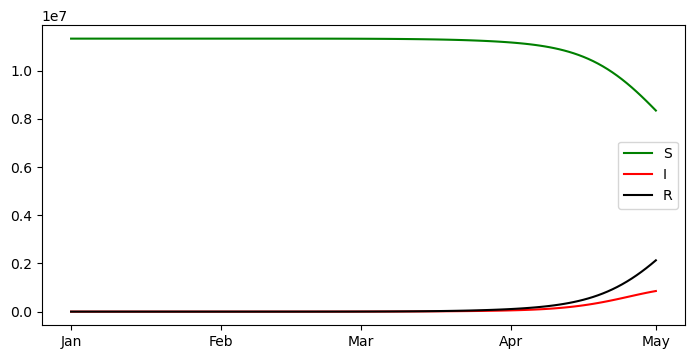

In [11]:
fig,ax=plt.subplots(figsize=(8.3, 11.7/3))

# aggregate over spatial patches and ages
agg = new_simout['prevalence'].groupby(by=['date', 'disease_state']).sum()

# visualise
ax.plot(dates, agg.loc[(slice(None), 'S')], color='green', label='S')
ax.plot(dates, agg.loc[(slice(None), 'I')], color='red', label='I')
ax.plot(dates, agg.loc[(slice(None), 'R')], color='black', label='R')
ax.legend()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()
plt.close()